# Visual Analysis of Model Performance

## Imports & Setup
This notebook imports all necessary libraries and modules using `from utils.imports import *`, which centralizes all dependencies required for training. See `utils/imports.py` for full details.


In [ ]:
# Imports from utils/imports.py
from utils.imports import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, matplotlib.pyplot as plt, seaborn as sns, numpy as np

## Individual Model Visualizations

### Support Vector Machine (SVM)

#### Confusion Matrix

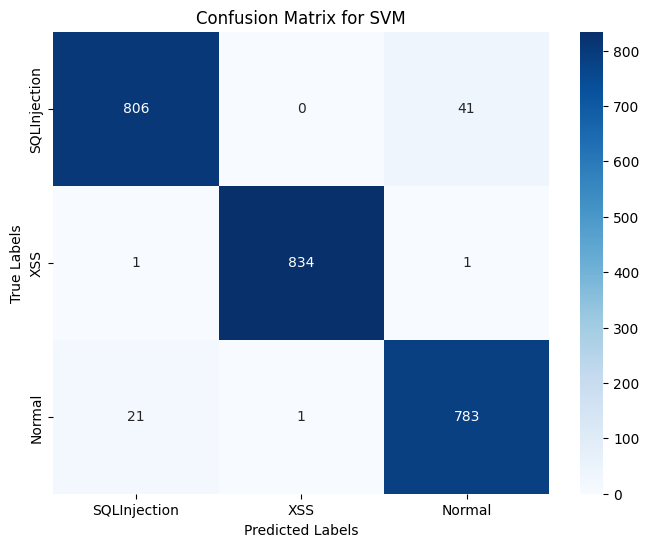

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM')
plt.show()

### Random Forest

#### Confusion Matrix

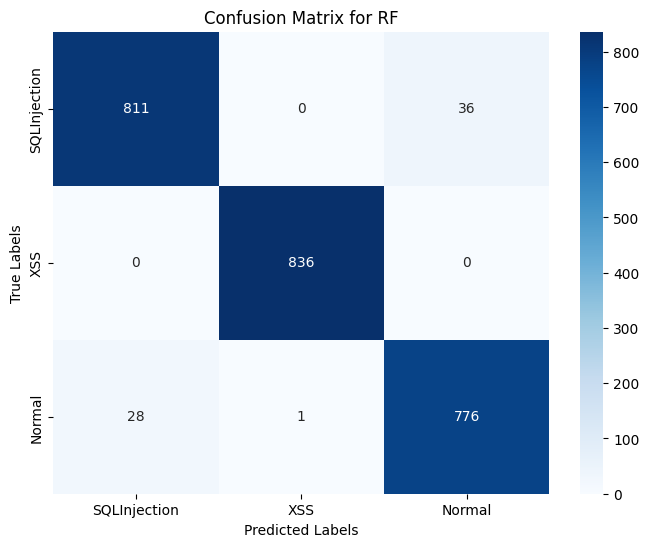

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RF')
plt.show()

### Logistic Regression

#### Confusion Matrix

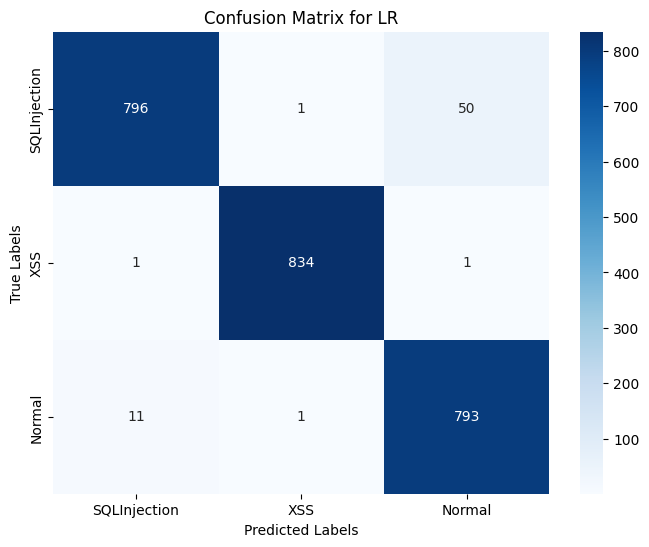

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for LR')
plt.show()

### Gradient Boosting

#### Confusion Matrix

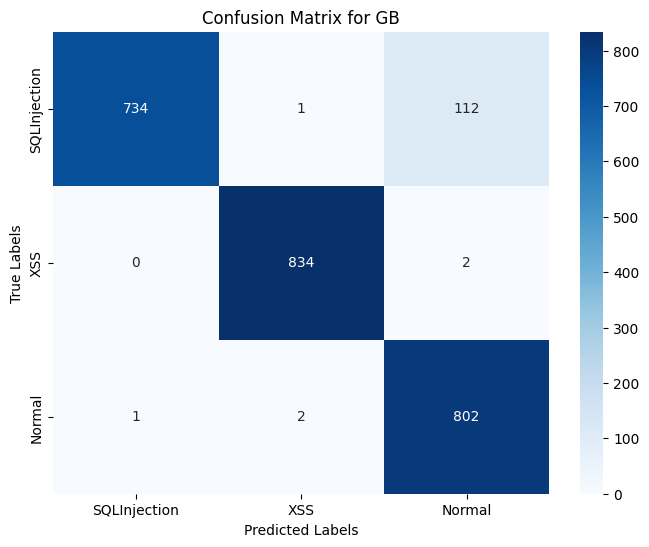

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for GB')
plt.show()

### Multi-Layer Perceptron (MLP) Neural Networks

#### Confusion Matrix

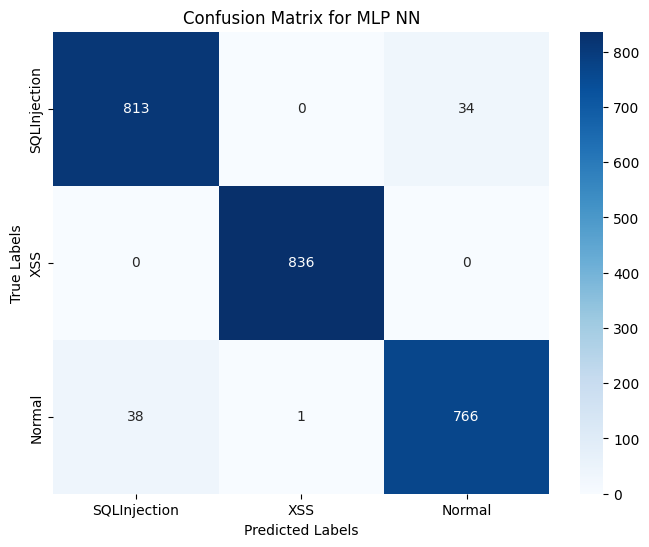

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MLP NN')
plt.show()

### Extra-Trees Extremely Randomized Trees

#### Confusion Matrix

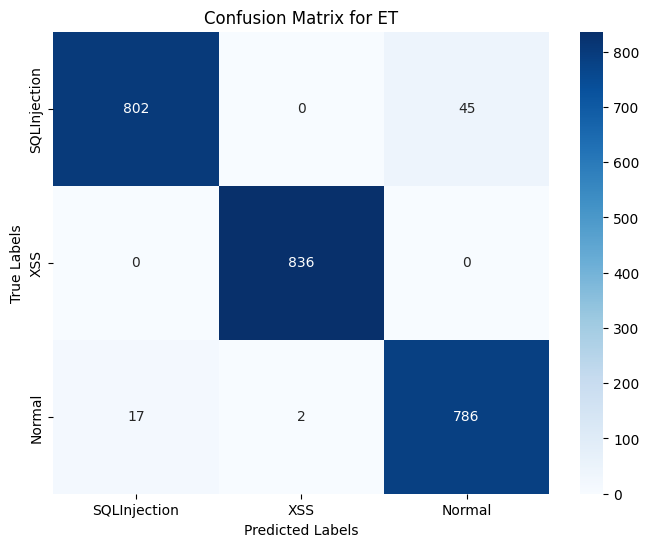

In [ ]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_et)

# Step 2: Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['SQLInjection', 'XSS', 'Normal'],
            yticklabels=['SQLInjection', 'XSS', 'Normal'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ET')
plt.show()

#### Confusion Matrix

## All Model Accuracy Comparison

### Model Accuracy Comparison - Individual Models Bar Plot:

Text(0.5, 1.0, 'Model Accuracy Comparison')

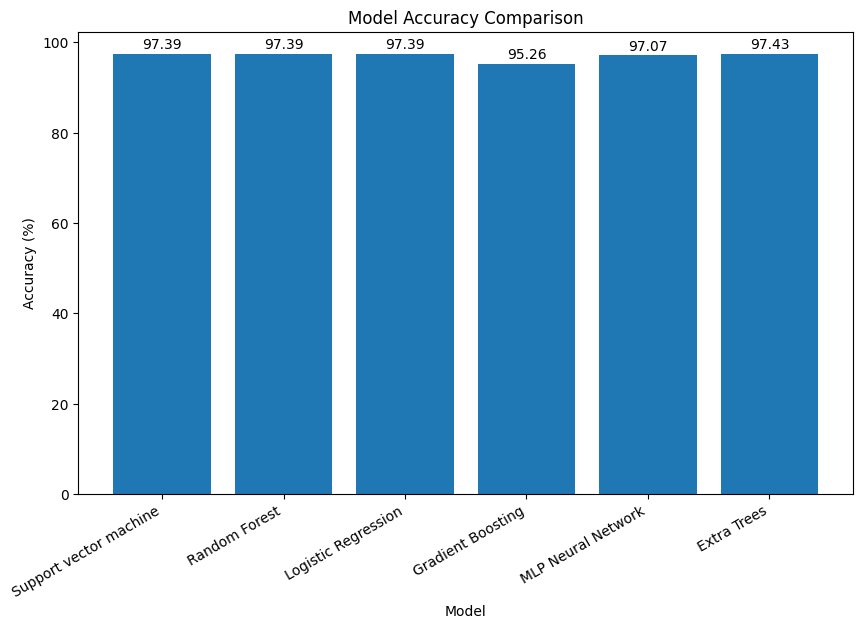

In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(model_accuracy.keys(),
        model_accuracy.values())

# Rotate x-ticks by 30 degrees
plt.xticks(rotation=30, ha='right')

# Add value labels on top of the bars
for key, value in model_accuracy.items():
    plt.text(key, value + 0.5, str(value), ha='center', va='bottom')

# Add labels and title for clarity
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

### Model Accuracy Comparison - Individual Models with Stacker6X:

<ipython-input-80-2976fef0d86f>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=model_accuracies, palette="viridis")


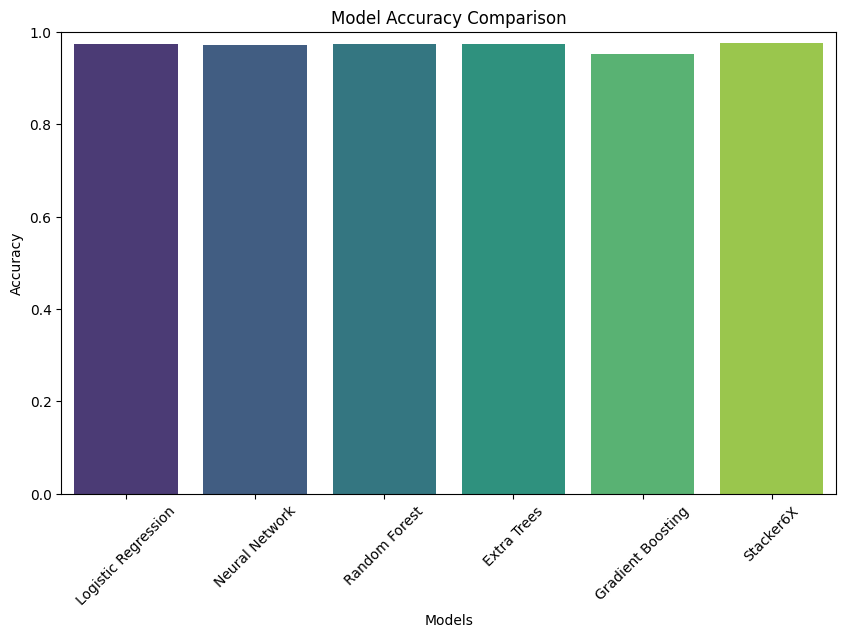

In [ ]:
# Function to calculate accuracy for each base model
def get_base_model_accuracies(models, X_test, y_test):
    accuracies = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracies[name] = accuracy_score(y_test, y_pred)
    return accuracies

# Prepare base models in a dictionary
base_models = {
    "Logistic Regression": lr_model,
    "Neural Network": nn_model,
    "Random Forest": rf_model,
    "Extra Trees": et_model,
    "Gradient Boosting": gb_model
}

# Get base model accuracies
base_accuracies = get_base_model_accuracies(base_models, X_test, y_test)

# Get accuracy for Stacker6X
Stacker6X_accuracy, _ = fusion_model.evaluate(X_test, y_test)

# Plot comparison of accuracies
plt.figure(figsize=(10, 6))
model_names = list(base_accuracies.keys()) + ["Stacker6X"]
model_accuracies = list(base_accuracies.values()) + [Stacker6X_accuracy]
sns.barplot(x=model_names, y=model_accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.ylim(0, 1.0)
plt.show()

### Actual Payload Class vs Predicted Class Prediction of Stacker6X


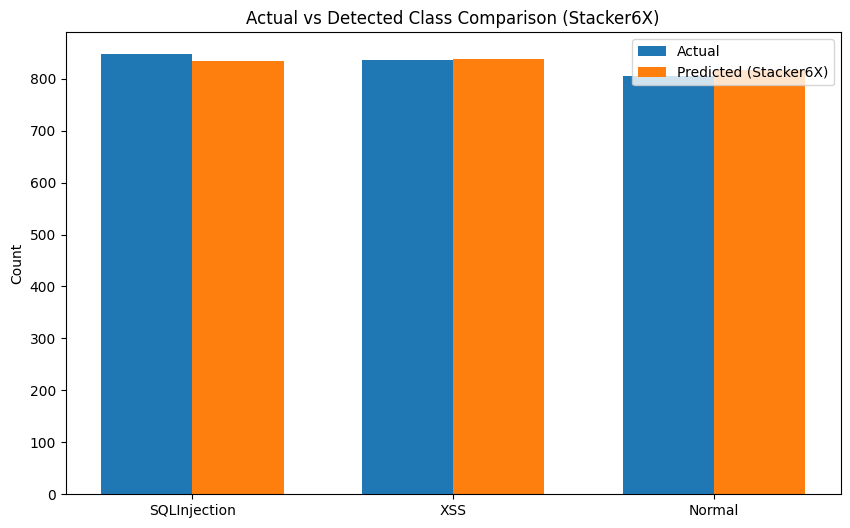

In [ ]:
# Generating predictions using the Stacker6X model
y_pred_Stacker6X = fusion_model.predict(X_test)  # Ensuring this line is executed before plotting or

# Mapping numeric classes to actual names to ensure it is correct
class_mapping = {0: "SQLInjection", 1: "XSS", 2: "Normal"}

# Replacing numeric class labels with names
actual_classes, actual_counts = np.unique(y_test, return_counts=True)
actual_class_names = [class_mapping[cls] for cls in actual_classes]

# Using the correct variable name for predicted classes
predicted_classes, predicted_counts = np.unique(y_pred_Stacker6X, return_counts=True)
predicted_class_names = [class_mapping[cls] for cls in predicted_classes]

# Plotting Actual vs Predicted Class Comparison
plt.figure(figsize=(10, 6))
x_labels = actual_class_names  # Use actual class names for x-axis labels
width = 0.35
plt.bar(np.arange(len(actual_classes)) - width/2, actual_counts, width=width, label="Actual")
plt.bar(np.arange(len(predicted_classes)) + width/2, predicted_counts, width=width, label="Predicted (Stacker6X)")
plt.xticks(ticks=np.arange(len(actual_classes)), labels=x_labels)
plt.ylabel("Count")
plt.title("Actual vs Predicted Class Comparison (Stacker6X)")
plt.legend()
plt.show()


### Confusion Matrix With Heatmap For Each Model

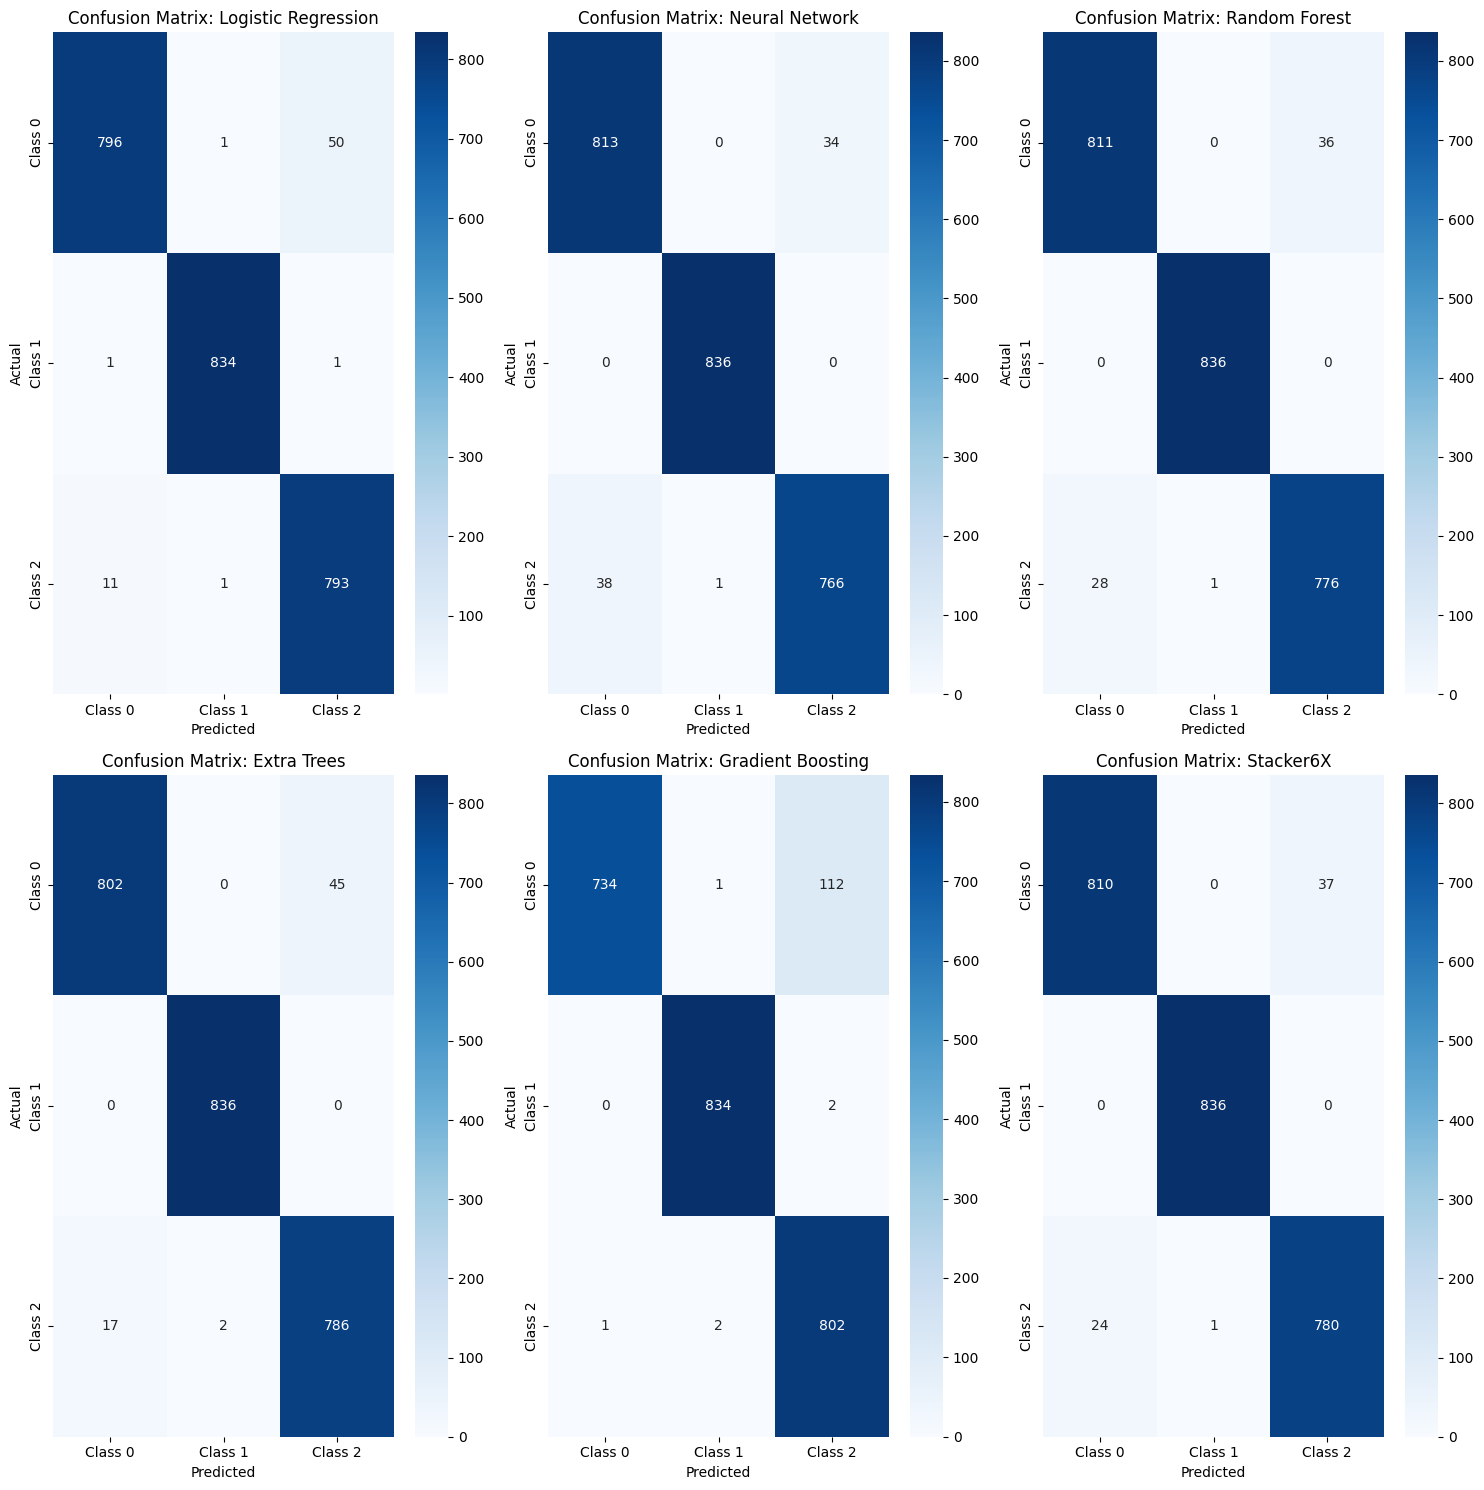

In [ ]:
# Plot confusion matrix for each model
# Models dictionary including Stacker6X
all_models = {**base_models, "Stacker6X": fusion_model}

# Create a 3x2 subplot for confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(15, 15))
axes = axes.ravel()  # Flatten axes for easy iteration

# Plot confusion matrices for each model
for i, (name, model) in enumerate(all_models.items()):
    if name == "Stacker6X":
        y_pred = fusion_model.predict(X_test)
    else:
        y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i],
                xticklabels=[f"Class {cls}" for cls in np.unique(y_test)],
                yticklabels=[f"Class {cls}" for cls in np.unique(y_test)])
    axes[i].set_title(f"Confusion Matrix: {name}")
    axes[i].set_ylabel("Actual")
    axes[i].set_xlabel("Predicted")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Gets the original indices of the test set from before the TF-IDF transformation
# else the X-text and y_pred will have uneven no of rows
test_indices = y_test.reset_index().index  # y_test still has the original indices

# Ensures that predictions are added to the right rows in df3 using the original indices
df3.loc[test_indices, 'y_pred_Stacker6X'] = y_pred_Stacker6X

# Verify by printing the first few rows of df3
print(df3.head())

                                             Payload  SQLInjection  XSS  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...             1    0   
1  -5420'   union all select 2508 2508 2508 2508 ...             1    0   
2  -2857%'       union all select 7167 7167 7167 ...             1    0   
3  ssssssssssssssssssssssssssssssssssssssssssssss...             1    0   
4  j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68axy...             1    0   

   Normal                                     Payload_Tokens  \
0       0  [ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1i...   
1       0  [-5420, ', union, all, select, 2508, 2508, 250...   
2       0  [-2857, %, ', union, all, select, 7167, 7167, ...   
3       0  [sssssssssssssssssssssssssssssssssssssssssssss...   
4       0  [j95utpnafk32s451w4kxzhahkqzs98irp97aesd5n68ax...   

                                     Payload_Cleaned  Payload_Length  Label  \
0  ghjv9ef1y69cd6i59ihp6u3rsihkkx4z40nkyoqsdam1iq...              18      0   
1  -54